In [1]:
import coco_dataset
import pathlib
import show_utils
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

In [2]:
inp_size = (368, 368)
targ_size = (46, 46)
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("../coco") / "images" / "train2017"),
    annFile=str(
        pathlib.Path("../coco")
        / "annotations"
        / "annotations"
        / "person_keypoints_train2017.json"
    ),
    transform=transforms.Compose(
        [
            transforms.Resize((368, 368)),
            transforms.ToTensor(),
            transforms.ConvertImageDtype(torch.float32),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ]
    ),
)
i = 0

loading annotations into memory...
Done (t=6.95s)
creating index...
index created!


In [11]:
i=0

19


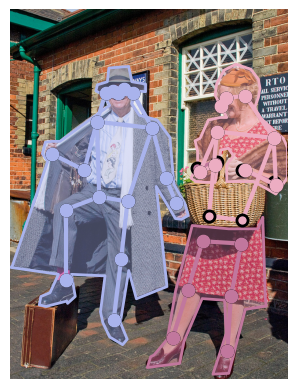

In [145]:
sample = coco_dataset[i]

tf_image, pafs, heatmaps, mask_out, keypoints, image, target = sample

show_utils.show_coco(image, target, coco_dataset.coco, draw_bbox=False)

# show_utils.show1(mask_out)

# show_utils.show_annotated(tf_image, keypoints, size=targ_size)

# plt.figure()
# show_utils.show_heatmaps_combined(heatmaps)


# plt.figure()
# show_utils.show_pafs_combined(pafs)


# plt.figure()
# show_utils.show_pafs_quiver_combined(pafs, size=targ_size)
# plt.figure()
# show_utils.show_heatmaps(heatmaps)

# plt.figure()
# show_utils.show_pafs(pafs)


# show_utils.show_pafs_quiver(pafs, size=targ_size)


# print(torch.any((mask_out != 0) & (mask_out != 1)))

print(i)
i += 1

In [146]:
import post
import numpy as np
import common

In [147]:
heatmaps = transforms.functional.resize(
    heatmaps, (image.size[1], image.size[0]), transforms.functional.InterpolationMode.BICUBIC
)

pafs = transforms.functional.resize(
    pafs, (image.size[1], image.size[0]), transforms.functional.InterpolationMode.NEAREST
)

heatmaps = heatmaps.numpy()
pafs = pafs.numpy()

In [148]:
bodyparts = post.get_bodyparts(heatmaps)
print(bodyparts)


[[{'coords': array([370, 173]), 'score': 0.8910619, 'part_id': 0, 'id': 0}, {'coords': array([192, 151]), 'score': 0.99591386, 'part_id': 0, 'id': 1}], [{'coords': array([379, 159]), 'score': 0.9837387, 'part_id': 1, 'id': 2}, {'coords': array([202, 145]), 'score': 0.95614386, 'part_id': 1, 'id': 3}], [{'coords': array([182, 147]), 'score': 0.9850216, 'part_id': 2, 'id': 4}], [{'coords': array([412, 157]), 'score': 0.8725663, 'part_id': 3, 'id': 5}, {'coords': array([216, 149]), 'score': 0.94612896, 'part_id': 3, 'id': 6}], [{'coords': array([171, 149]), 'score': 0.90587544, 'part_id': 4, 'id': 7}], [{'coords': array([462, 229]), 'score': 0.86988026, 'part_id': 5, 'id': 8}, {'coords': array([251, 213]), 'score': 0.9424329, 'part_id': 5, 'id': 9}], [{'coords': array([362, 216]), 'score': 0.92056495, 'part_id': 6, 'id': 10}, {'coords': array([154, 201]), 'score': 0.922181, 'part_id': 6, 'id': 11}], [{'coords': array([479, 312]), 'score': 0.96144503, 'part_id': 7, 'id': 12}, {'coords': ar

In [149]:
limb_scores = post.get_limb_scores(pafs, bodyparts)
print(limb_scores)

[[{'id_a': 0, 'id_b': 2, 'score': 0.9933042118268516, 'limb_id': 0}, {'id_a': 0, 'id_b': 3, 'score': 0.0, 'limb_id': 0}, {'id_a': 1, 'id_b': 2, 'score': 0.883246200270416, 'limb_id': 0}, {'id_a': 1, 'id_b': 3, 'score': 5.972877740582026, 'limb_id': 0}], [{'id_a': 0, 'id_b': 4, 'score': 0.0, 'limb_id': 1}, {'id_a': 1, 'id_b': 4, 'score': 0.0, 'limb_id': 1}], [{'id_a': 2, 'id_b': 5, 'score': 9.996225960259306, 'limb_id': 2}, {'id_a': 2, 'id_b': 6, 'score': -1.9625028228507824, 'limb_id': 2}, {'id_a': 3, 'id_b': 5, 'score': 2.9516457839773604, 'limb_id': 2}, {'id_a': 3, 'id_b': 6, 'score': 9.999134173723425, 'limb_id': 2}], [{'id_a': 4, 'id_b': 7, 'score': 5.999909430976452, 'limb_id': 3}], [{'id_a': 0, 'id_b': 8, 'score': 8.941190646652176, 'limb_id': 4}, {'id_a': 0, 'id_b': 9, 'score': -0.7271211593378808, 'limb_id': 4}, {'id_a': 1, 'id_b': 8, 'score': 0.988594734627612, 'limb_id': 4}, {'id_a': 1, 'id_b': 9, 'score': 7.889121238743034, 'limb_id': 4}], [{'id_a': 0, 'id_b': 10, 'score': 9

In [150]:
connections = post.get_connections(limb_scores, bodyparts)
print(connections)

[[{'id_a': 1, 'id_b': 3, 'score': 5.972877740582026, 'limb_id': 0}, {'id_a': 0, 'id_b': 2, 'score': 0.9933042118268516, 'limb_id': 0}], [{'id_a': 0, 'id_b': 4, 'score': 0.0, 'limb_id': 1}], [{'id_a': 3, 'id_b': 6, 'score': 9.999134173723425, 'limb_id': 2}, {'id_a': 2, 'id_b': 5, 'score': 9.996225960259306, 'limb_id': 2}], [{'id_a': 4, 'id_b': 7, 'score': 5.999909430976452, 'limb_id': 3}], [{'id_a': 0, 'id_b': 8, 'score': 8.941190646652176, 'limb_id': 4}, {'id_a': 1, 'id_b': 9, 'score': 7.889121238743034, 'limb_id': 4}], [{'id_a': 0, 'id_b': 10, 'score': 9.997885858986729, 'limb_id': 5}, {'id_a': 1, 'id_b': 11, 'score': 7.937362703824618, 'limb_id': 5}], [{'id_a': 8, 'id_b': 13, 'score': 8.987623421051296, 'limb_id': 6}, {'id_a': 9, 'id_b': 14, 'score': 8.979599497230115, 'limb_id': 6}], [{'id_a': 11, 'id_b': 15, 'score': 8.971347270513078, 'limb_id': 7}, {'id_a': 10, 'id_b': 16, 'score': 8.962424238758421, 'limb_id': 7}], [{'id_a': 13, 'id_b': 18, 'score': 9.948497751661572, 'limb_id':

In [151]:
humans = post.assign_limbs_to_people(connections)
print(humans)

[[1, 3, 6, 9, 11, 14, 15, 17, 20, 23, 26, 28, 30, 32, 34], [0, 2, 4, 5, 7, 8, 10, 13, 16, 18, 19, 22, 25], [21, 27, 31], [24, 29, 33]]
